<a href="https://colab.research.google.com/github/magedyasse/ML-Topic/blob/main/Decision_Tree_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [135]:
data = pd.read_csv(
    'https://github.com/datagy/data/raw/main/titanic.csv',
    usecols=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked'])
data = data.dropna()

print(data.head())

   Survived  Pclass     Sex   Age  SibSp     Fare Embarked
0         0       3    male  22.0      1   7.2500        S
1         1       1  female  38.0      1  71.2833        C
2         1       3  female  26.0      0   7.9250        S
3         1       1  female  35.0      1  53.1000        S
4         0       3    male  35.0      0   8.0500        S


In [136]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked']
target = 'Survived'

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


In [138]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Survived,712.0,NaN,NaN,NaN,0.404494,0.491139,0.0,0.0,0.0,1.0,1.0
Pclass,712.0,NaN,NaN,NaN,2.240169,0.836854,1.0,1.0,2.0,3.0,3.0
Sex,712,2,male,453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,712.0,NaN,NaN,NaN,29.642093,14.492933,0.42,20.0,28.0,38.0,80.0
SibSp,712.0,NaN,NaN,NaN,0.514045,0.930692,0.0,0.0,0.0,1.0,5.0
Fare,712.0,NaN,NaN,NaN,34.567251,52.938648,0.0,8.05,15.64585,33.0,512.3292
Embarked,712,3,S,554,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-411677293.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/tmp/ipython-input-411677293.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col

In [140]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,712.0,0.404494,0.491139,0.00,0.00,0.00000,1.0,1.0000
Pclass,712.0,2.240169,0.836854,1.00,1.00,2.00000,3.0,3.0000
Age,712.0,29.642093,14.492933,0.42,20.00,28.00000,38.0,80.0000
SibSp,712.0,0.514045,0.930692,0.00,0.00,0.00000,1.0,5.0000
Fare,712.0,34.567251,52.938648,0.00,8.05,15.64585,33.0,512.3292


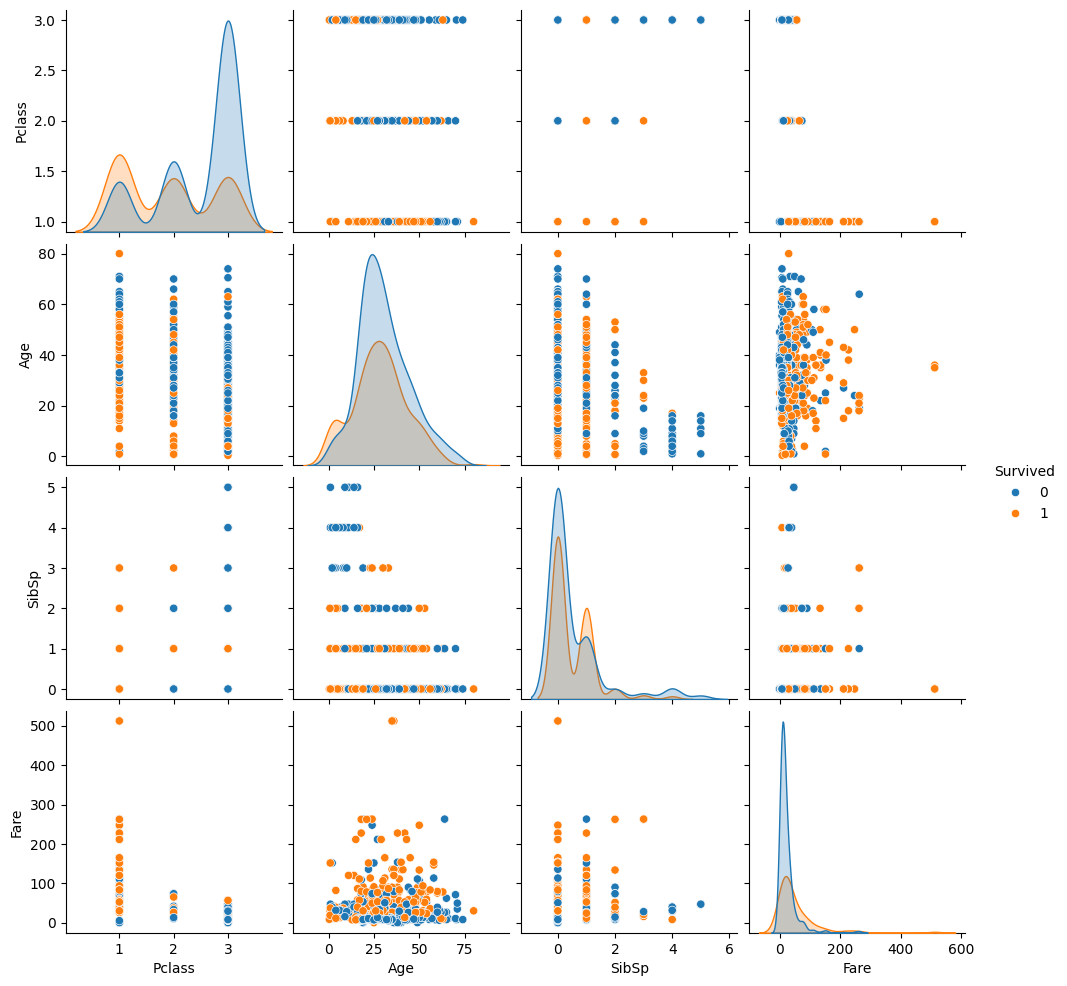

In [141]:
sns.pairplot(data=data, hue='Survived')
plt.show()

In [142]:
X = data.copy()
y = X.pop('Survived')

In [143]:
X['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [144]:
X['Sex'].replace({'male': 0, 'female': 1}, inplace=True)
X['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2}, inplace=True)

/tmp/ipython-input-3930076036.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/tmp/ipython-input-3930076036.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
/tmp/ipython-input-3930076036.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment

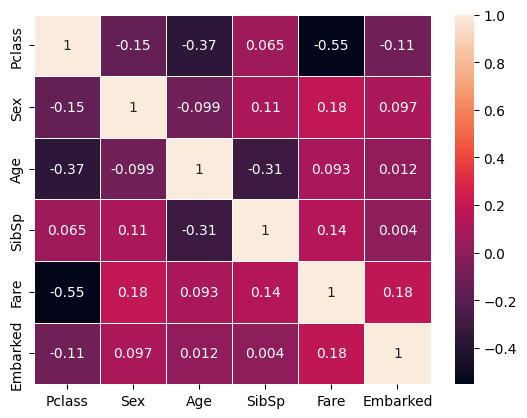

In [145]:
sns.heatmap(X.corr(), annot=True ,linewidth=.5)
plt.show()

In [146]:
corr = X.corr()
corr

,Pclass,Sex,Age,SibSp,Fare,Embarked
Pclass,1.000000,-0.150826,-0.365902,0.065187,-0.552893,-0.108502
Sex,-0.150826,1.000000,-0.099037,0.106296,0.182457,0.097129
Age,-0.365902,-0.099037,1.000000,-0.307351,0.093143,0.012186
SibSp,0.065187,0.106296,-0.307351,1.000000,0.139860,0.004021
Fare,-0.552893,0.182457,0.093143,0.139860,1.000000,0.176859
Embarked,-0.108502,0.097129,0.012186,0.004021,0.176859,1.000000


In [147]:
X.head()

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,0,22.0,1,7.2500,0
1,1,1,38.0,1,71.2833,1
2,3,1,26.0,0,7.9250,0
3,1,1,35.0,1,53.1000,0
4,3,0,35.0,0,8.0500,0


In [148]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [150]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(534, 6)
(178, 6)
(534,)
(178,)




```
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0
)
```



In [151]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(
   max_depth=4,
   criterion='entropy',
   splitter='best'

)

model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [152]:
# from sklearn.model_selection import GridSearchCV

# params = {
#     'criterion':  ['gini', 'entropy'],
#     'max_depth':  [None, 2, 4, 6, 8, 10],
#     'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
#     'splitter': ['best', 'random']
# }

# clf = GridSearchCV(
#     estimator=DecisionTreeClassifier(),
#     param_grid=params,
#     cv=5,
#     n_jobs=5,
#     verbose=1,
# )

# clf.fit(X_train, y_train)
# print(clf.best_params_)

In [153]:

pred = model.predict(X_test)

In [154]:
print(pred[:5])

[1 1 0 0 0]


In [155]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.7640449438202247


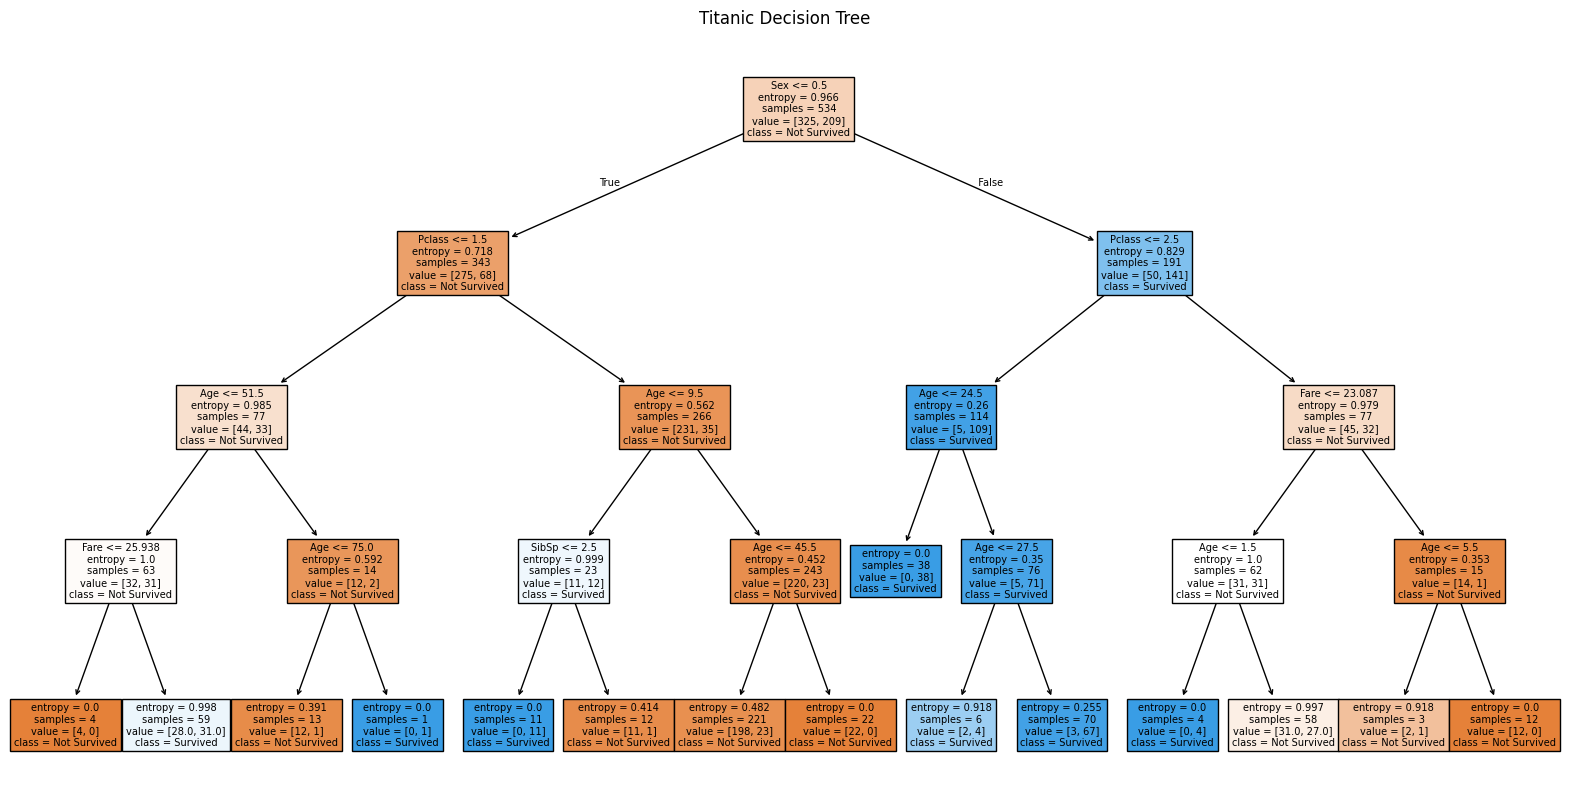

In [156]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Titanic Decision Tree")
plt.show()

In [157]:
 ## If I need to Save as PDF

from sklearn.tree import export_graphviz
import graphviz


dot_data = export_graphviz(model, out_file=None,
feature_names=features,
class_names=['Not Survived', 'Survived'],
filled=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph.view()

'decision_tree.pdf'